In [34]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import osmnx as ox
import os
import glob
from tqdm import tqdm

## Using SUMO

```bash
# Extract a portion of the map using osmium based on a bounding box
%osmium extract -b 116.62,40.05,116.17,39.83 beijing-20240908.osm.pbf -o beijing-20240908-comp.osm.pbf

# Convert the extracted map to OSM format
%osmium cat beijing-20240908-comp.osm.pbf -o beijing-20240908-comp.osm

# Convert to SUMO network format
%netconvert --osm-files beijing-20240908-comp.osm -o beijing-20240908-comp.net.xml
```

/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_97872/3959190076.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_97872/3959190076.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')


(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

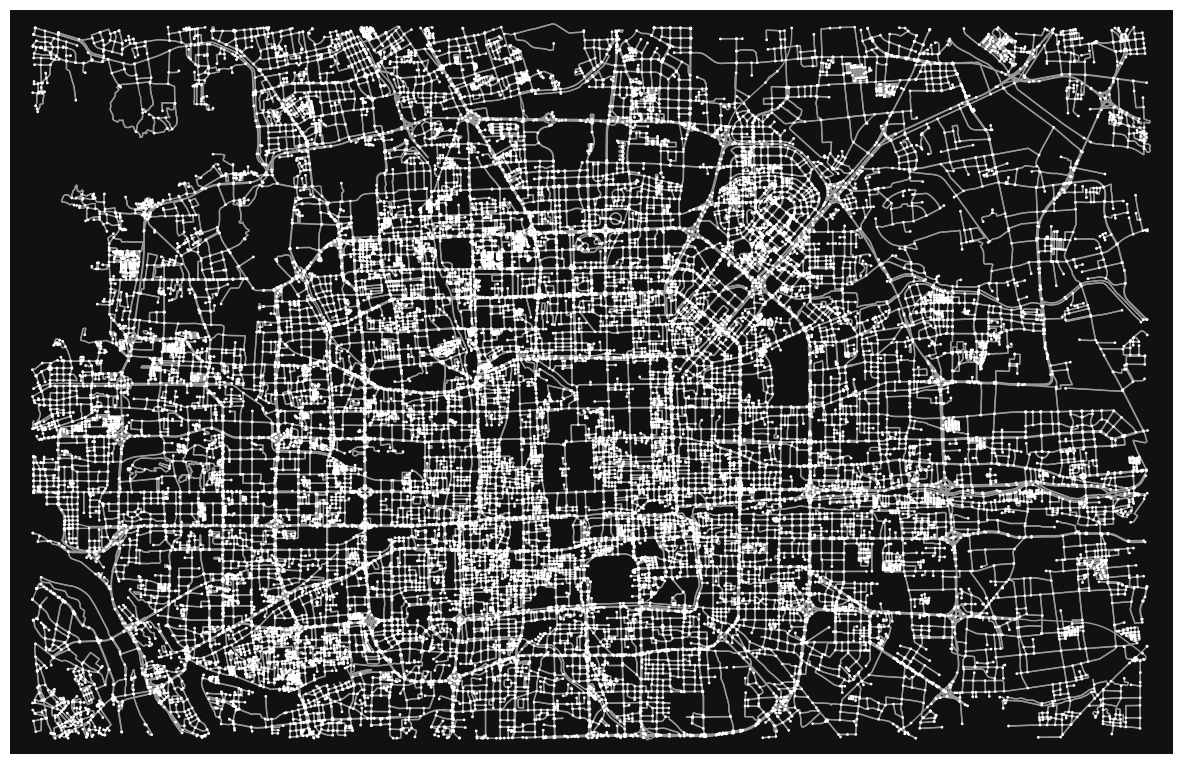

In [32]:
# Using OSMnx to download the road network of Beijing
beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)

In [35]:
# Read all data at ../data/tdrive/taxi_log_2008_by_id/x.txt
files = glob.glob('../data/tdrive/taxi_log_2008_by_id/*')
files.sort()

df_all = pd.DataFrame()
for file in tqdm(files, desc='Processing files'):
    # Read txt file
    try:
        df = pd.read_csv(file, header=None, sep=',')
    except:
        continue
    df_all = pd.concat([df_all, df])

Processing files: 100%|██████████| 10357/10357 [1:27:43<00:00,  1.97it/s]    


In [29]:

# df_all.columns = ['taxi_id', 'latitude', 'longitude', 'timestamp']
print(df_all.head())

                 0                            1
0  3644,2008-02-02  13:40:59,116.37497,39.85789
1  3644,2008-02-02  13:42:11,116.37542,39.85764
2  3644,2008-02-02  13:42:49,116.37727,39.85775
3  3644,2008-02-02  13:42:59,116.37746,39.85787
4  3644,2008-02-02  13:44:00,116.37749,39.85817


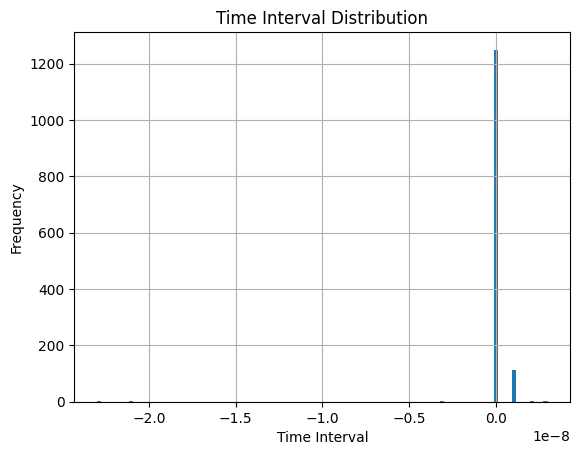

In [22]:
# Plot distribution time interval between two consecutive points
df['date_time'] = pd.to_datetime(df['date_time'])
df['time_interval'] = df['date_time'].diff().dt.total_seconds()
df['time_interval'].hist(bins=100)
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.title('Time Interval Distribution')
plt.show()

Trajectories count:  1371


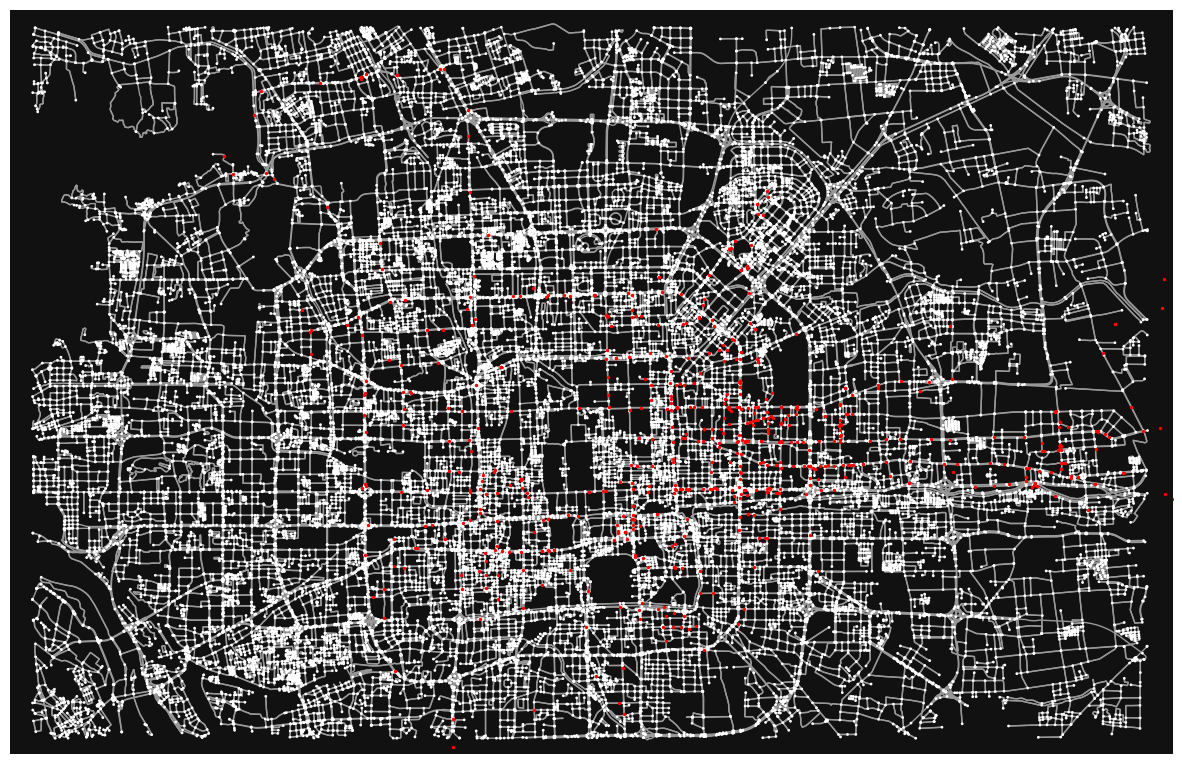

In [23]:
# Read the data
df = pd.read_csv('../data/tdrive/taxi_log_2008_by_id/3.txt', header=None, names=['taxi_id', 'date_time', 'longitude', 'latitude'])
df.head()

print("Trajectories count: ", df.shape[0])

# Plot the data
fig, ax = ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)
ax.scatter(df['longitude'], df['latitude'], c='red', s=2)

plt.show()